In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:

lower_bound = 10
upper_bound = 50
peak_value = 40

# Calculate the peak location as a percentage of the width
peak_location_percentage = (peak_value - lower_bound) / (upper_bound - lower_bound)

print("Peak Location as Percentage:", peak_location_percentage)


exp1 = 0.9
exp2 = 1.1

#Define the search space
problem = {
    'num_vars': 18,
    'names': ['flask_time','seed_time', 'seed_fed_batch', 'seed_batch_med','seed_conversion', 'main_time', 'fed_batch', 'batch_med', 'conversion', 'solid_conc', 'res_vol', 'equi1', 'dia1', 'flush1', 'equi2','dia2', 'flush2', 'failure'],
    'bounds': [[21600*exp1, 108000*exp2],
                [43200*exp1, 108000*exp2],
                [0.001636*exp1, 0.004908*exp2],
               [0.010225325*exp1, 0.030675975*exp2],
               [0.9*exp1, 0.98*exp2],
               [64800*exp1, 144000*exp2],
               [0.0190875*exp1, 0.0572625*exp2],
               [0.102253255*exp1, 0.306759765*exp2],
                [0.9*exp1, 0.98*exp2],
                [50*exp1, 300*exp2],
               [0.28903585*exp1,  0.86710755*exp2],
               [0.01*exp1, 0.05*exp2],
               [10*exp1, 50, peak_location_percentage*exp2],
               [0.0015*exp1,  0.0045*exp2],
               [0.01*exp1, 0.05*exp2],
               [10*exp1, 50, peak_location_percentage*exp2],
               [0.00067*exp1,  0.002*exp2],
               [0.0*exp1, 0.1*exp2]],

    'dists': ['unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif',  'unif', 'unif','triang', 'unif', 'unif','triang', 'unif', 'unif']
}


Peak Location as Percentage: 0.75


In [13]:
param_values = saltelli.sample(problem, 512)


C:\Users\nt320\AppData\Local\Temp\ipykernel_21824\354238130.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 512)


In [14]:
print(param_values.shape)

(19456, 18)


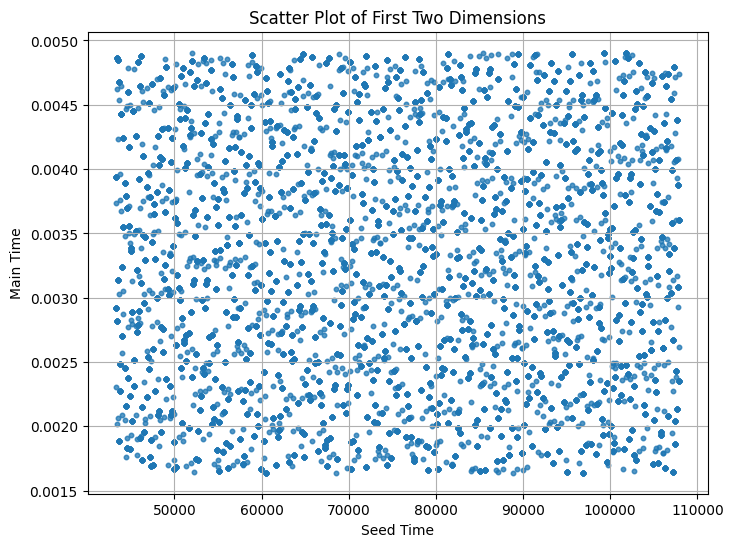

In [15]:
# Plot Saltelli Sobol sequence
# Extract the first two dimensions
x = param_values[:, 1]
y = param_values[:, 2]

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.scatter(x, y, s=10, alpha=0.5)  # s controls the marker size, alpha controls transparency
plt.title('Scatter Plot of First Two Dimensions')
plt.xlabel('Seed Time')
plt.ylabel('Main Time')
plt.grid(True)
plt.show()


In [16]:
import win32com.client
import os

def SuperPro2(p):

    p = p.T
    print(p)
    excelObject = win32com.client.Dispatch("Excel.Application")  #instantiate excel app
    temp1= os.getcwd()+'\\pDNA.xlsm'

        
    wb = excelObject.Workbooks.Open(temp1)

    excelObject.Application.Run('BeforeSuperExcelMatlab')

    temp3 =np.shape(p)[1]
    print(temp3)
    F =np.zeros((8,1,temp3))
    for i in range(temp3):
        
        
        #### ADD ROUND    ###################################
        temp4 = excelObject.Application.Run('SuperExcelMatlab', p[0,i], p[1,i], p[2,i], p[3,i], p[4,i], p[5,i], p[6,i], p[7,i], p[8,i], p[9,i], p[10,i], p[11,i], np.round(p[12,i]), p[13,i], p[14,i], np.round(p[15,i]), p[16,i], p[17,i])
        
        F[0,0,i] = temp4[0] # Formulation concentration (kg/m3)
        F[1,0,i] = temp4[1] #  Productivity (kg/batch)
        F[2,0,i] = temp4[2] # CAPEX ($)
        F[3,0,i] = temp4[3] # OPEX ($/y)
        F[4,0,i] = temp4[4] # Number of batches
        F[5,0,i] = temp4[5] # Batch time (s)
        F[6,0,i] = temp4[6] # Cycle time (s)
        F[7,0,i] = temp4[3]/(temp4[4]*(temp4[1]/0.001)) # Cost per gram ($/g)
        

    excelObject.Application.Run('AfterSuperExcelMatlab')
    
    wb.Close(False)
    excelObject.Application.Quit()

    
    #excelObject.Application.Quit()
    
    return F

In [18]:
Y= SuperPro2(param_values)

[[2.18531250e+04 6.01593750e+04 2.18531250e+04 ... 7.21406250e+04
  7.21406250e+04 7.21406250e+04]
 [5.94632812e+04 5.94632812e+04 7.16132812e+04 ... 6.38929688e+04
  6.38929688e+04 6.38929688e+04]
 [4.75782031e-03 4.75782031e-03 4.75782031e-03 ... 4.47024219e-03
  4.47024219e-03 4.47024219e-03]
 ...
 [4.16380699e+01 4.16380699e+01 4.16380699e+01 ... 4.29013646e+01
  4.29013646e+01 4.29013646e+01]
 [1.83245117e-03 1.83245117e-03 1.83245117e-03 ... 1.08692383e-03
  1.11290039e-03 1.11290039e-03]
 [6.31835938e-02 6.31835938e-02 6.31835938e-02 ... 8.64257812e-02
  8.75976563e-02 8.64257812e-02]]
19456


In [ ]:

inputs = pd.DataFrame(param_values)

In [20]:
inputs.to_csv('inputs.csv', index=False)  # Set index=False to exclude row numbers

In [21]:
Y2 = Y.squeeze()

In [22]:
outputs = pd.DataFrame(Y2)
outputs.T.to_csv('outputs.csv', index=False)  # Set index=False to exclude row numbers